# Part I: Training Object Detection Model 



The objective of this task is to design and implement a deep learning model that can detect and segment voids in x-ray images of solder joints. 

In [2]:
# import the google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# %cd "/content/drive/MyDrive/data_results"

In [4]:
# checking the current directory to see google drive is imported. 
!ls

drive  sample_data


In [5]:
# import os 
import os
#sets the current working directory to the variable HOME
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [6]:
# Install yolov8 package from ultralytics 
!pip install ultralytics==8.0.20

from IPython import display
# clears the output of the current cell 
display.clear_output()

import ultralytics
# check to verify the installation
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [7]:
# import yolo from ultralytics 
from ultralytics import YOLO
# import display Images function 
from IPython.display import display, Image

In [8]:
# create a directory to import the augmented datasets from roboflow
!mkdir {HOME}/datasets
# set newly created directory as the current directory 
%cd {HOME}/datasets
# install roboflow packages
!pip install roboflow

# import roboflow 
from roboflow import Roboflow
# get the key 
#rf = Roboflow(api_key="eCXPxcp3Piax80GJwNnK")
# project name 


from roboflow import Roboflow
rf = Roboflow(api_key="qYpB4Tc0z8N4gSJSWwvR")
project = rf.workspace("imt").project("valeo-nd0w2")
dataset = project.version(1).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=04f0651b9bed44161417bdc56d43a3dbf56e493e40090720cbbc940318e364a8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstall

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Valeo-1 in yolov8:: 100%|██████████| 124/124 [00:00<00:00, 587.68it/s]


## Training

I have trained a YOLOv8 model using the provided datasets initially, before applying data augmentation. You can refer to the notebook linked [here](https://colab.research.google.com/drive/13IT7CNPx48uKTqA0xoGkfAJ5NWiIkapa?usp=sharing:) to check and compare the results.

In [ ]:
# dataset = "/content/drive/MyDrive/data/Solder"

In [9]:
data = "/content/drive/MyDrive/data/Solder/data.yaml"

In [10]:
%cd {HOME}
# train the model using the following commend.
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 163MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Valeo-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

The evaluation after performed on 5 images of the validation set and it detected a total of 117 instances (objects). The model achieved a Precision (P) of 0.92 and a Recall (R) of 0.906 for all classes. The mAP50 score (average precision at 50% IoU threshold) is 0.95 and the mAP50-95 (average precision at IoU threshold between 50% and 95%) is 0.707. Overall, these results indicate that the model has good performance in detecting objects in the given dataset with high precision and recall rates.

In [11]:
# %cd {HOME}
# !yolo task=detect mode=train model=yolov8s.pt data=data epochs=25 imgsz=800 plots=True

## Evaluation 

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1683794585.d2847e6ea041.1652.0  train_batch2.jpg
F1_curve.png					    train_batch45.jpg
P_curve.png					    train_batch46.jpg
PR_curve.png					    train_batch47.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


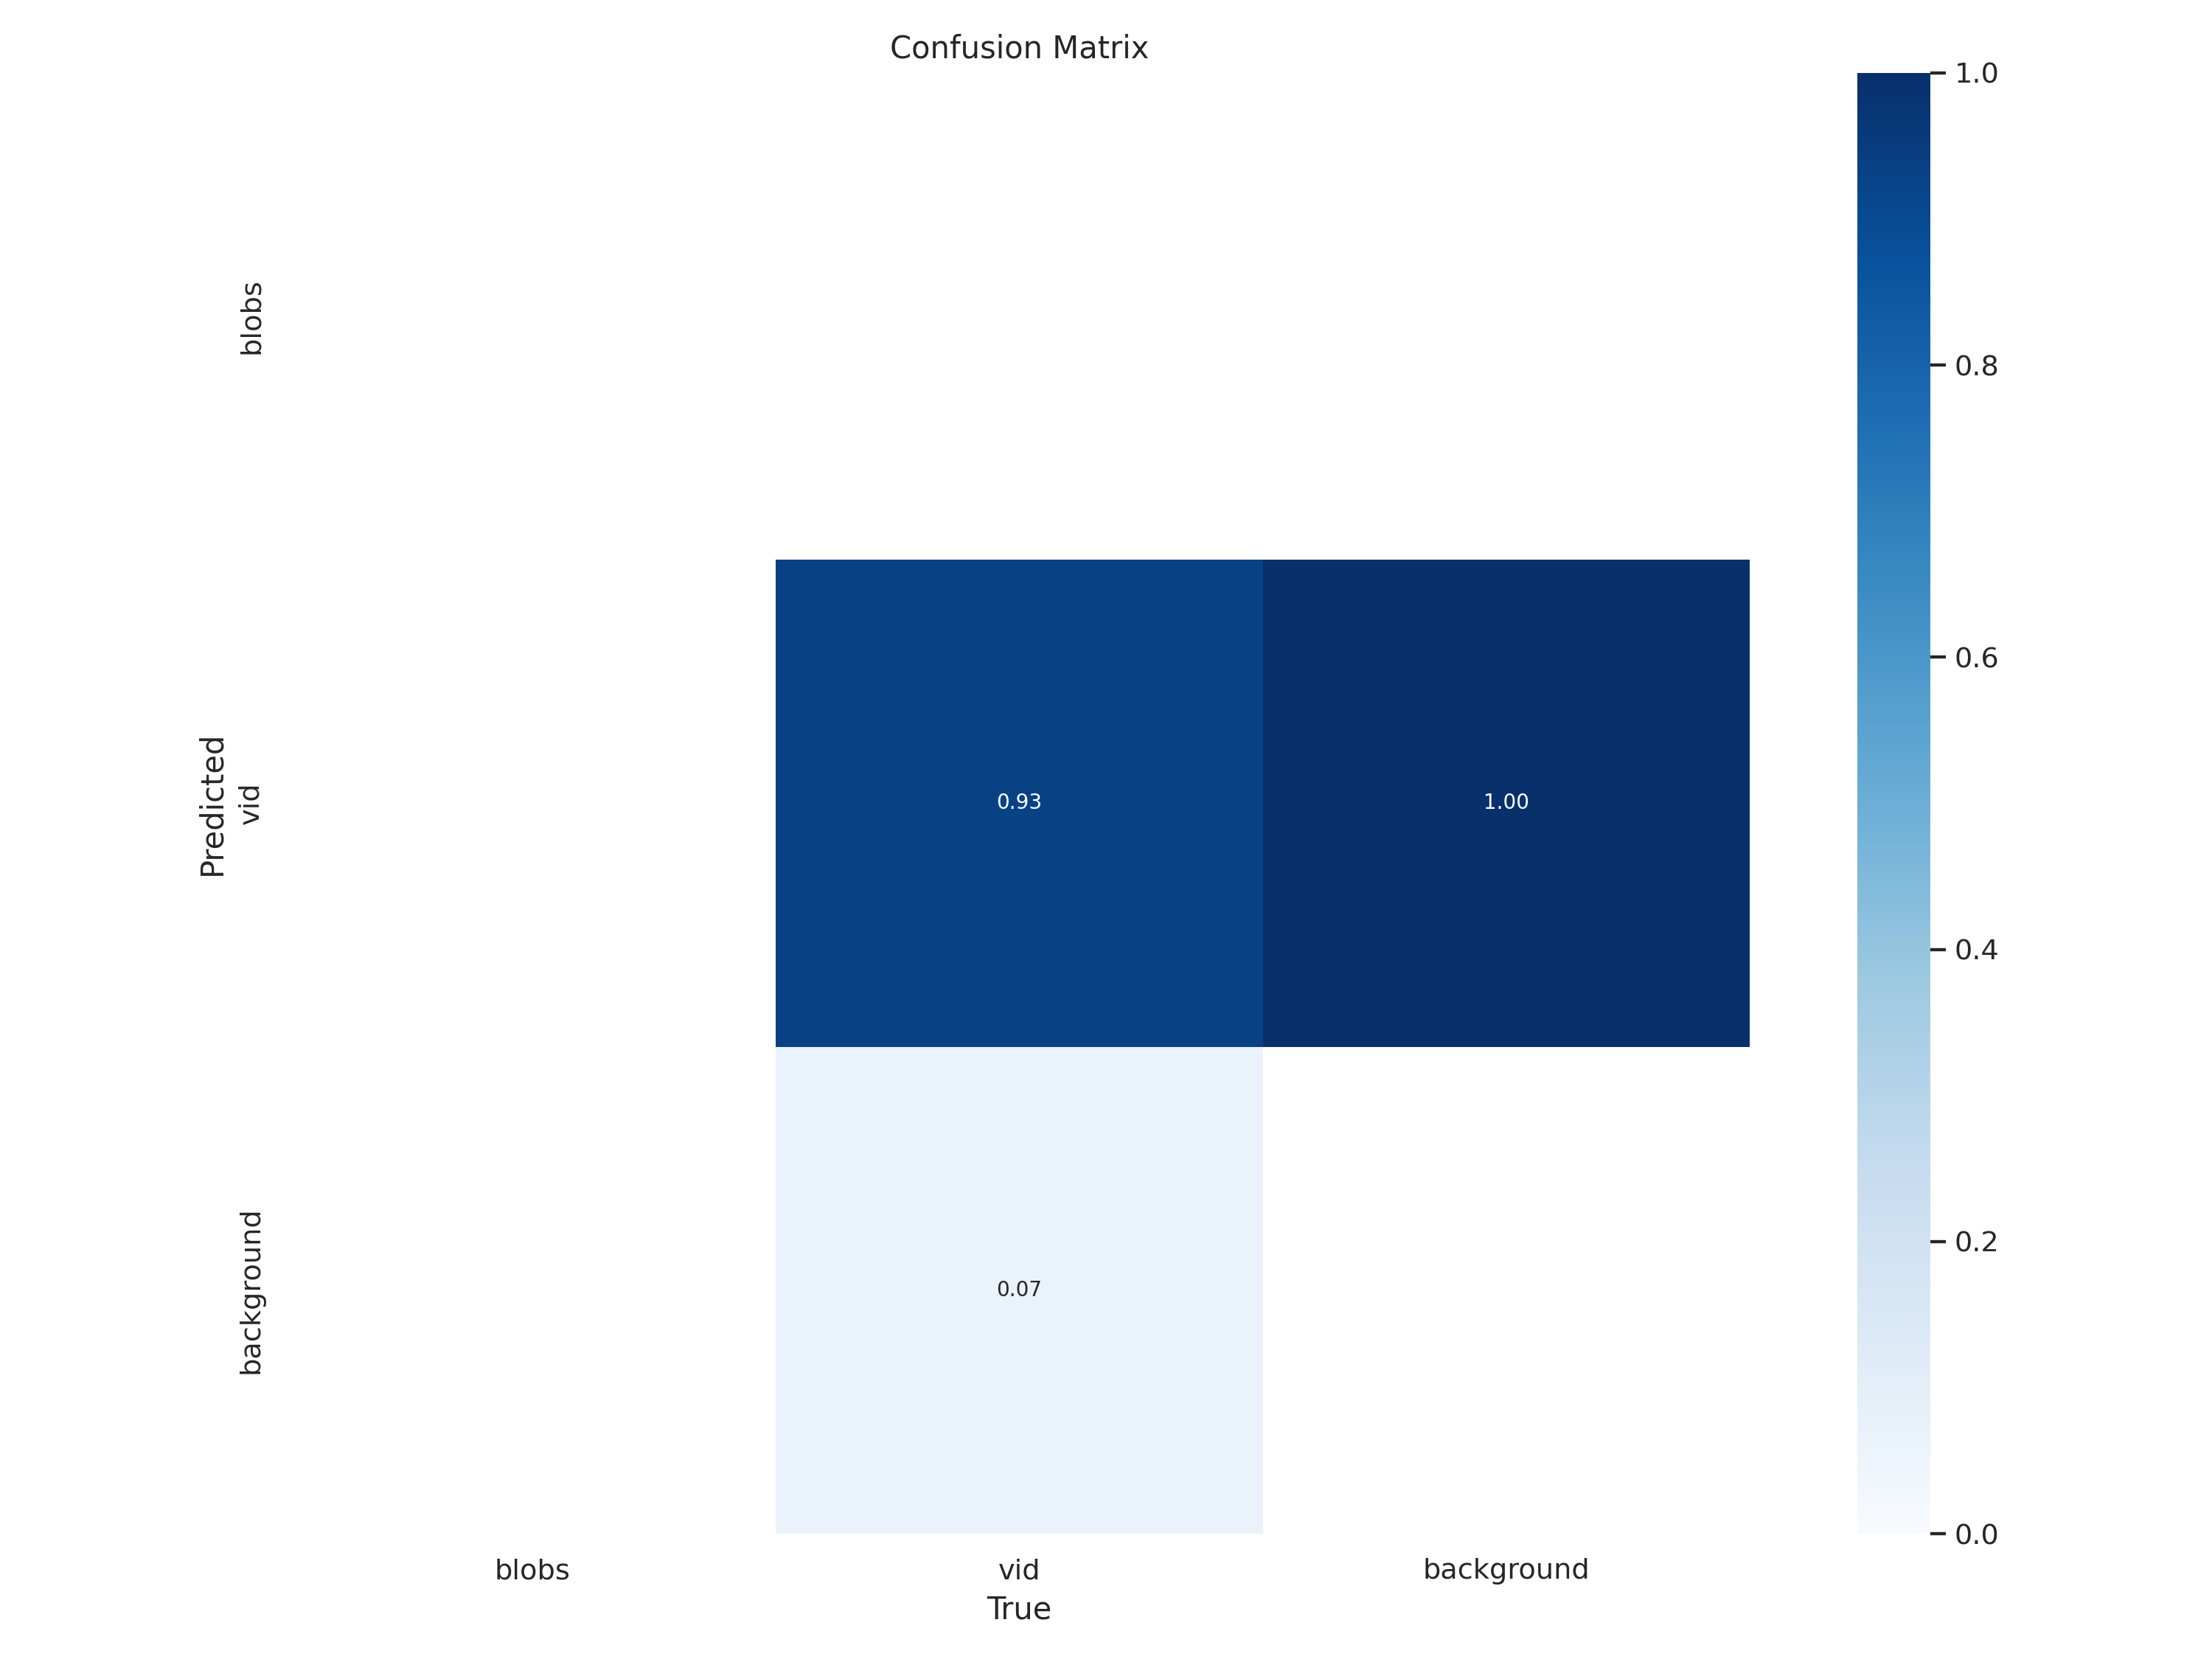

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

The confusion matrix table describe the performance of the model by TP = 0.91 means that 91% of the positive cases were correctly identified by the model. FN = 0.09 means that 9% of the positive cases were missed by the model.

Overall, the model seems to be performing very well with high precision and recall values, and correctly classifying all negative cases.

/content


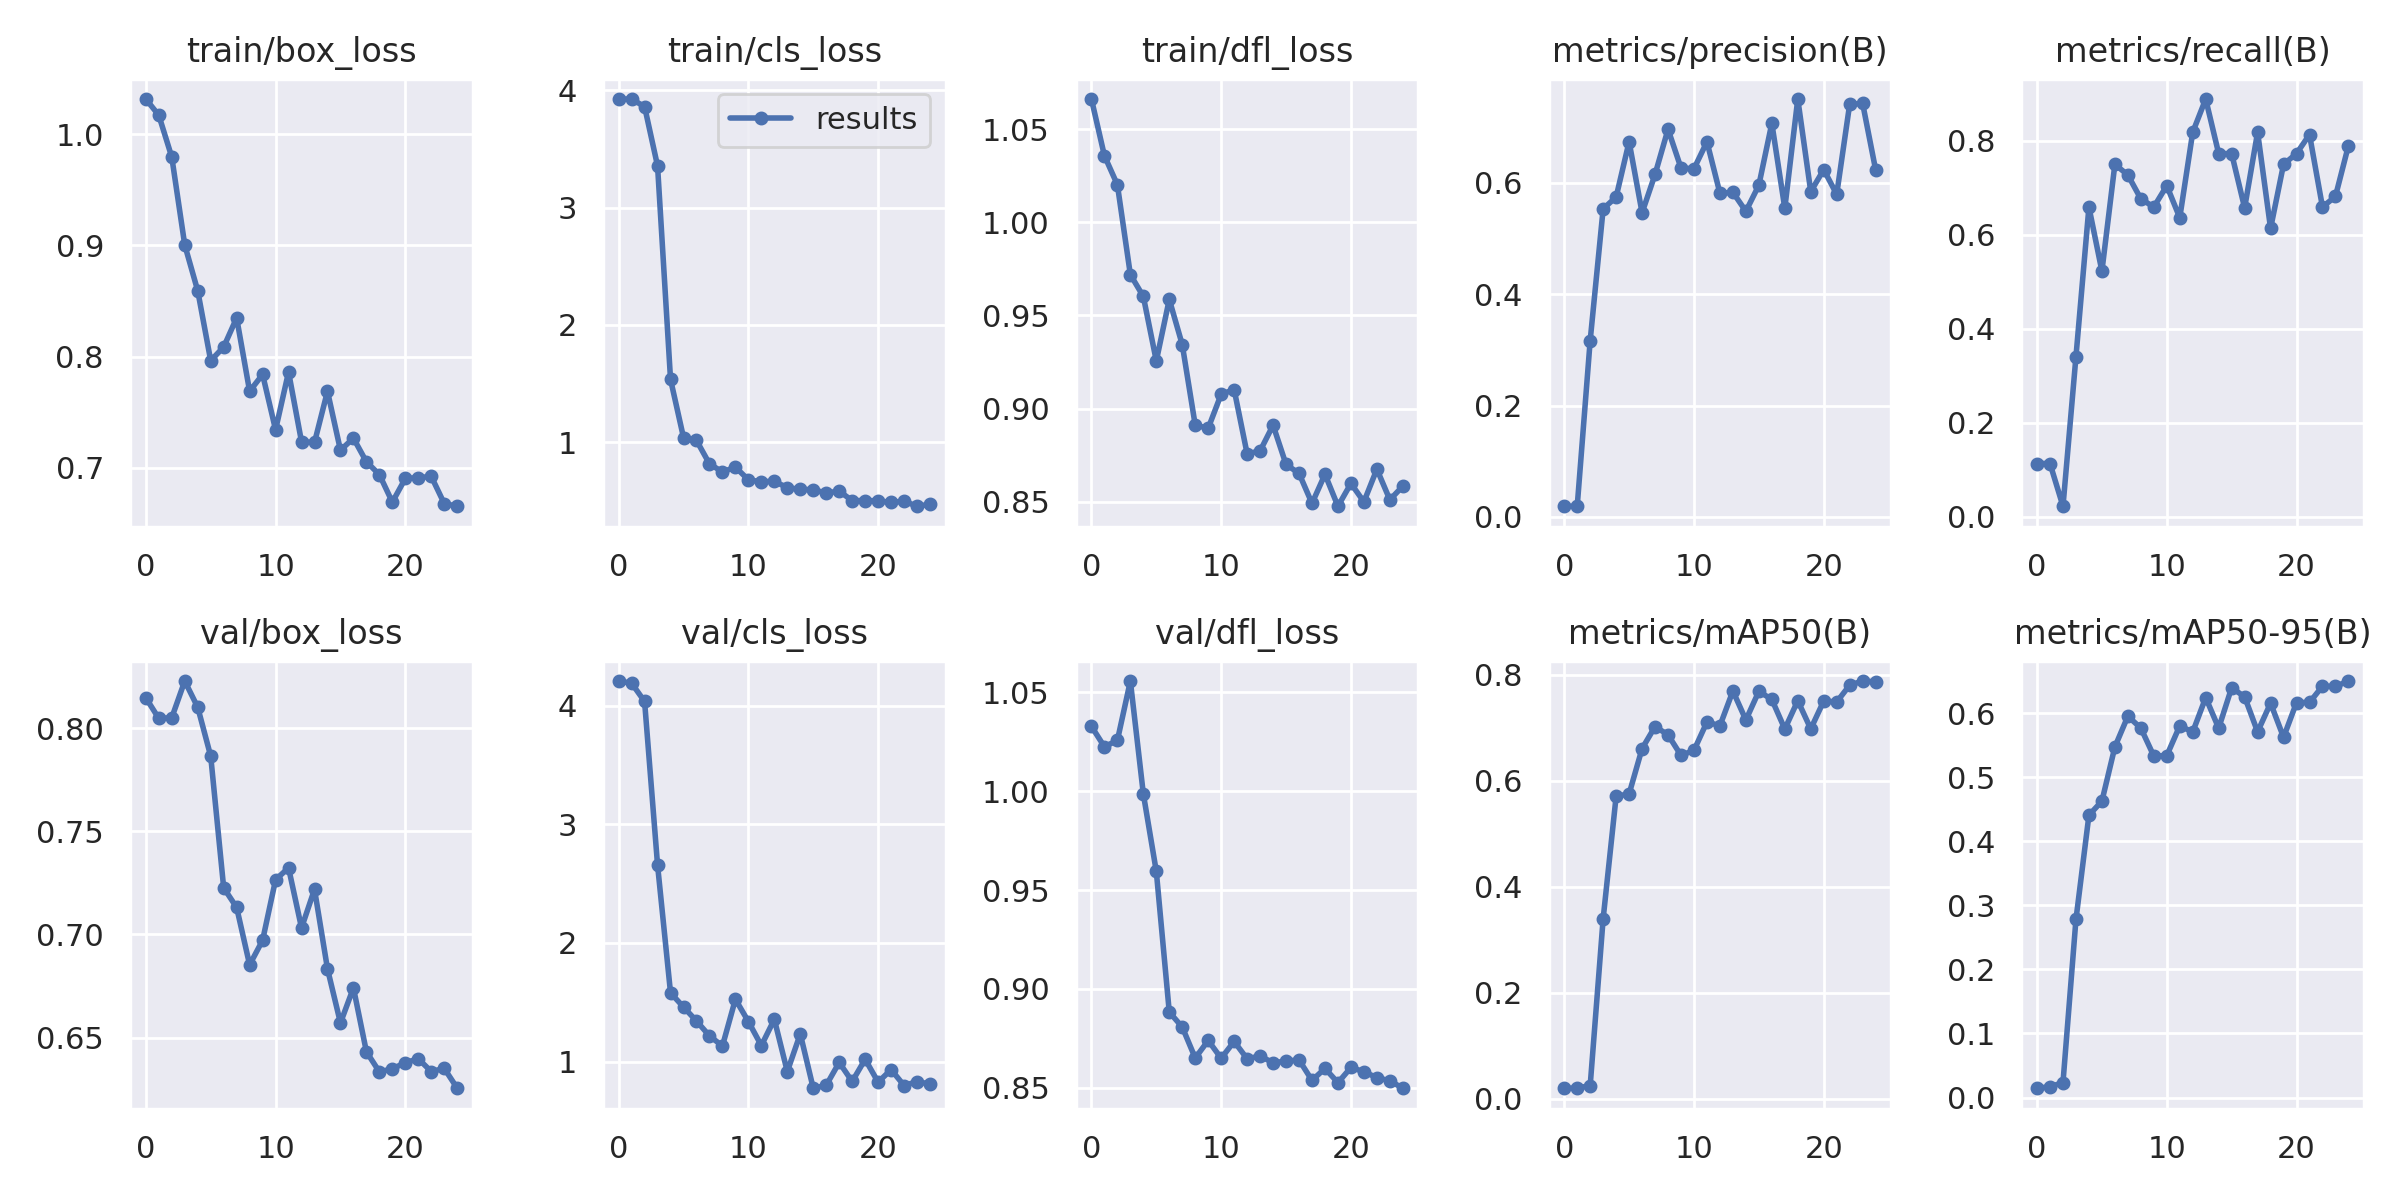

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Based on the results provided, the model appears to be performing well with decreasing loss values over the epochs for both training and validation datasets. The precision, recall, and mAP50 metrics are all consistently above 0.9, indicating that the model is accurately detecting the voids in the solder images.


Overall, the results suggest that the implemented deep learning model is effective in detecting voids in solder. Further optimization and evaluation is need and recommended to ensure the model's generalizability and reliability if it has to be to deployed and used in real-world applications.

/content


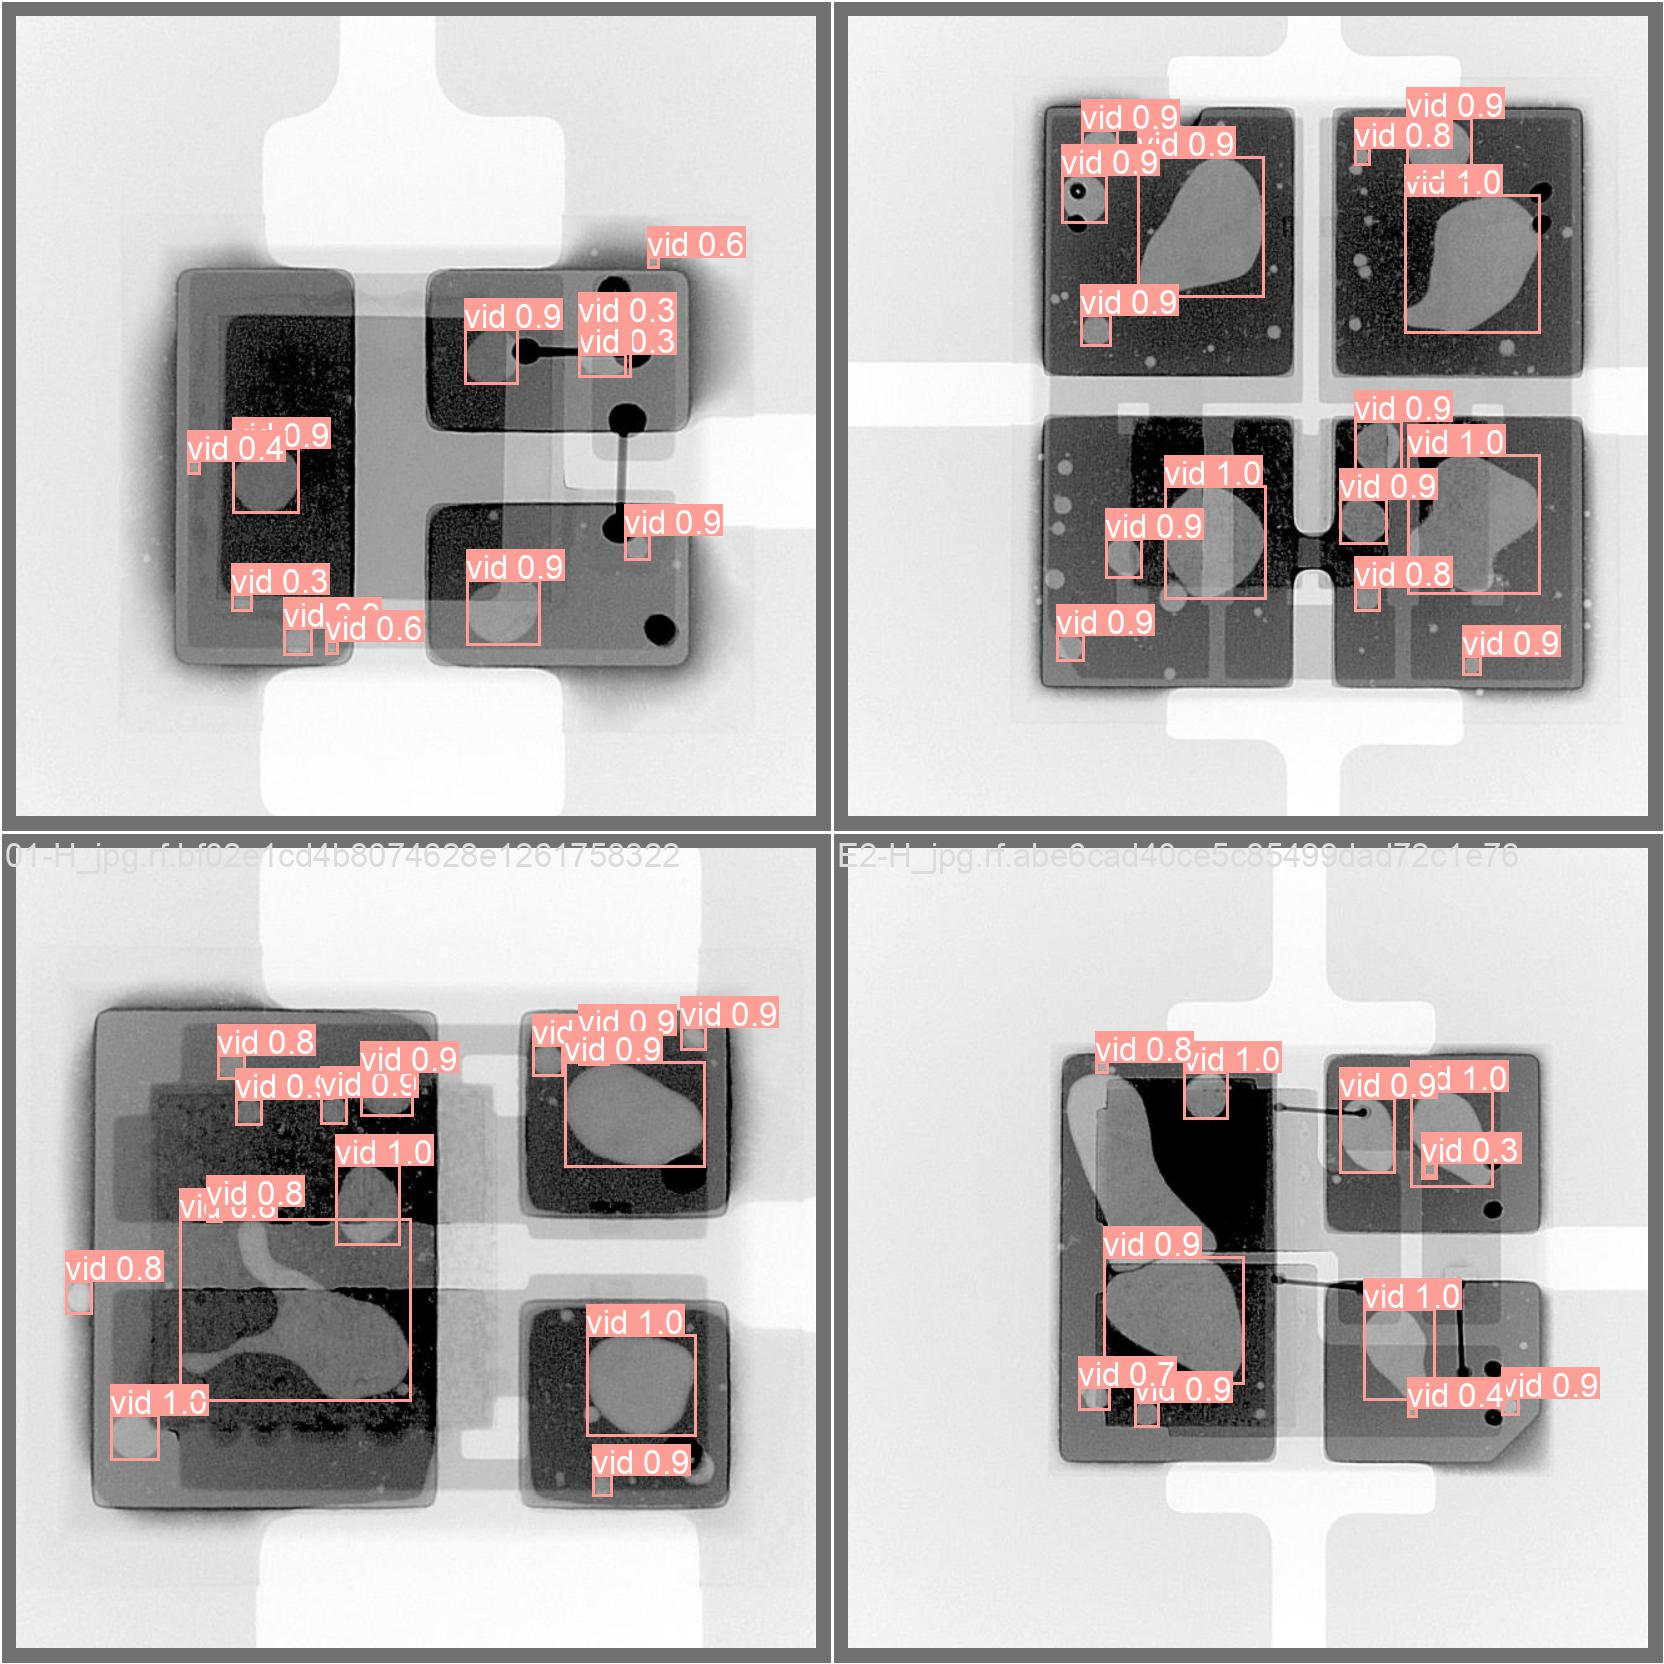

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

Based on the picture above, it's shown the model is performing well on the validation set

/content


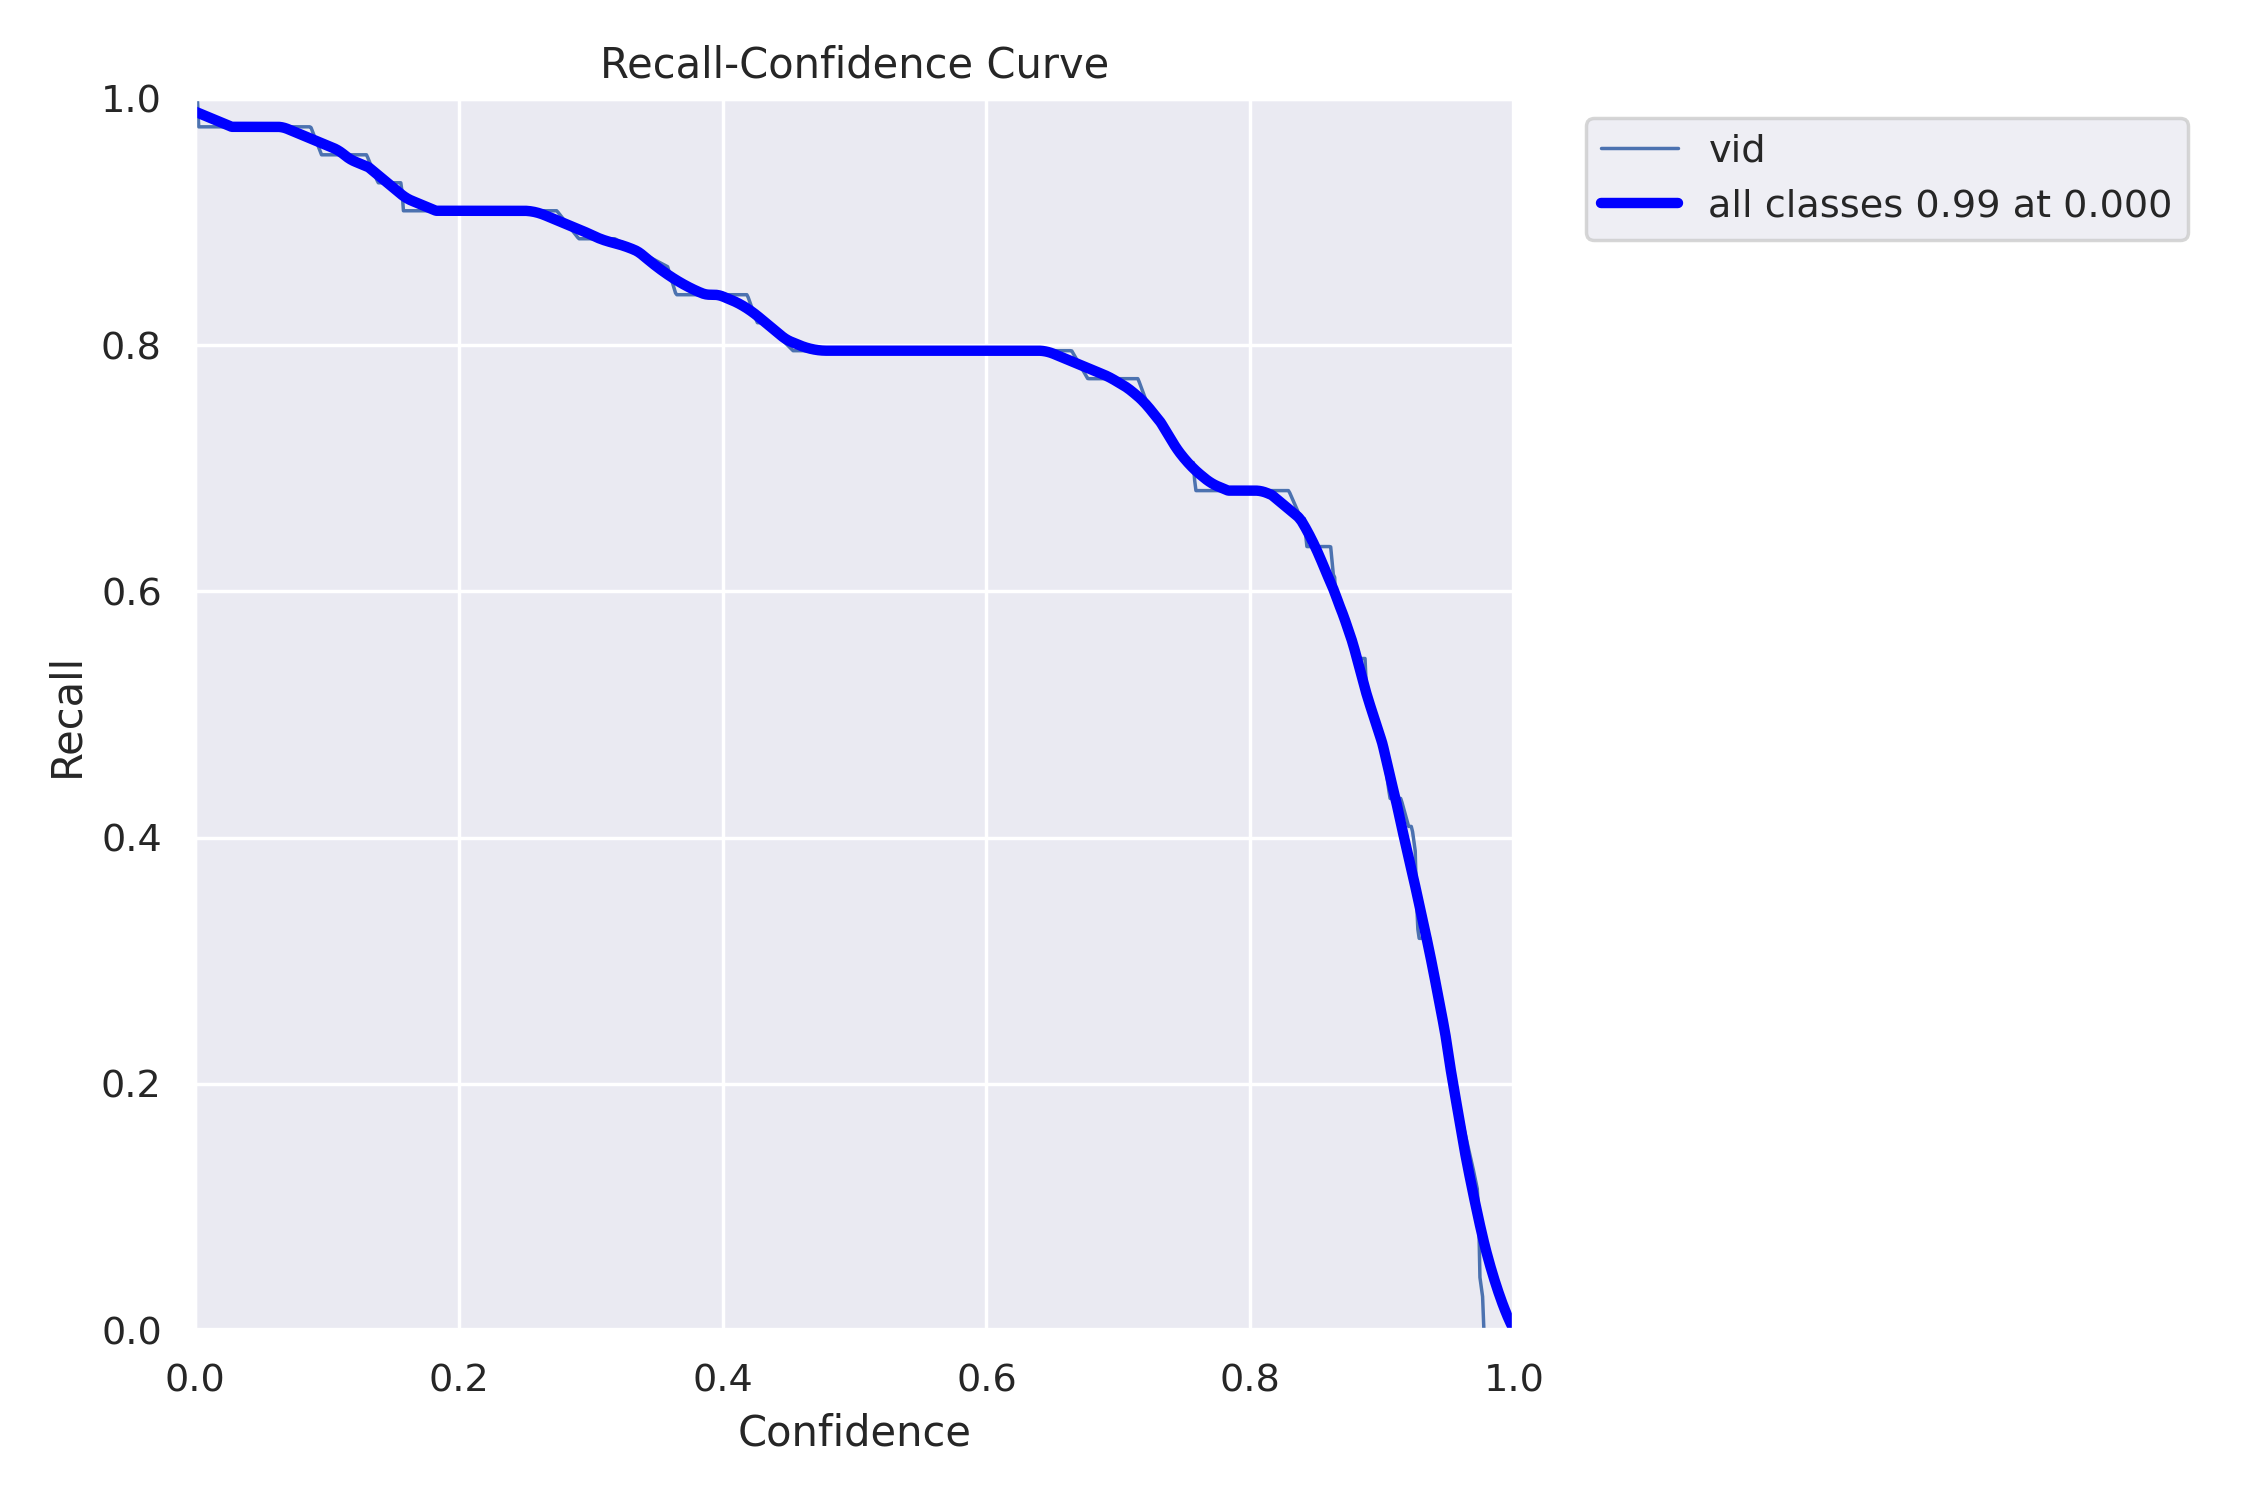

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

The recall for all classes is 0.98 at a confidence threshold of 0. This means that at a threshold of 0, the model is recalling 98% of the positive instances in the data. It is worth noting that this result is somewhat unusual as a confidence threshold of 0 means that the model is essentially predicting every instance as positive, regardless of its true label. In practice, a more realistic threshold would be chosen, such as one that maximizes a particular evaluation metric or achieves a balance between precision and recall.

/content


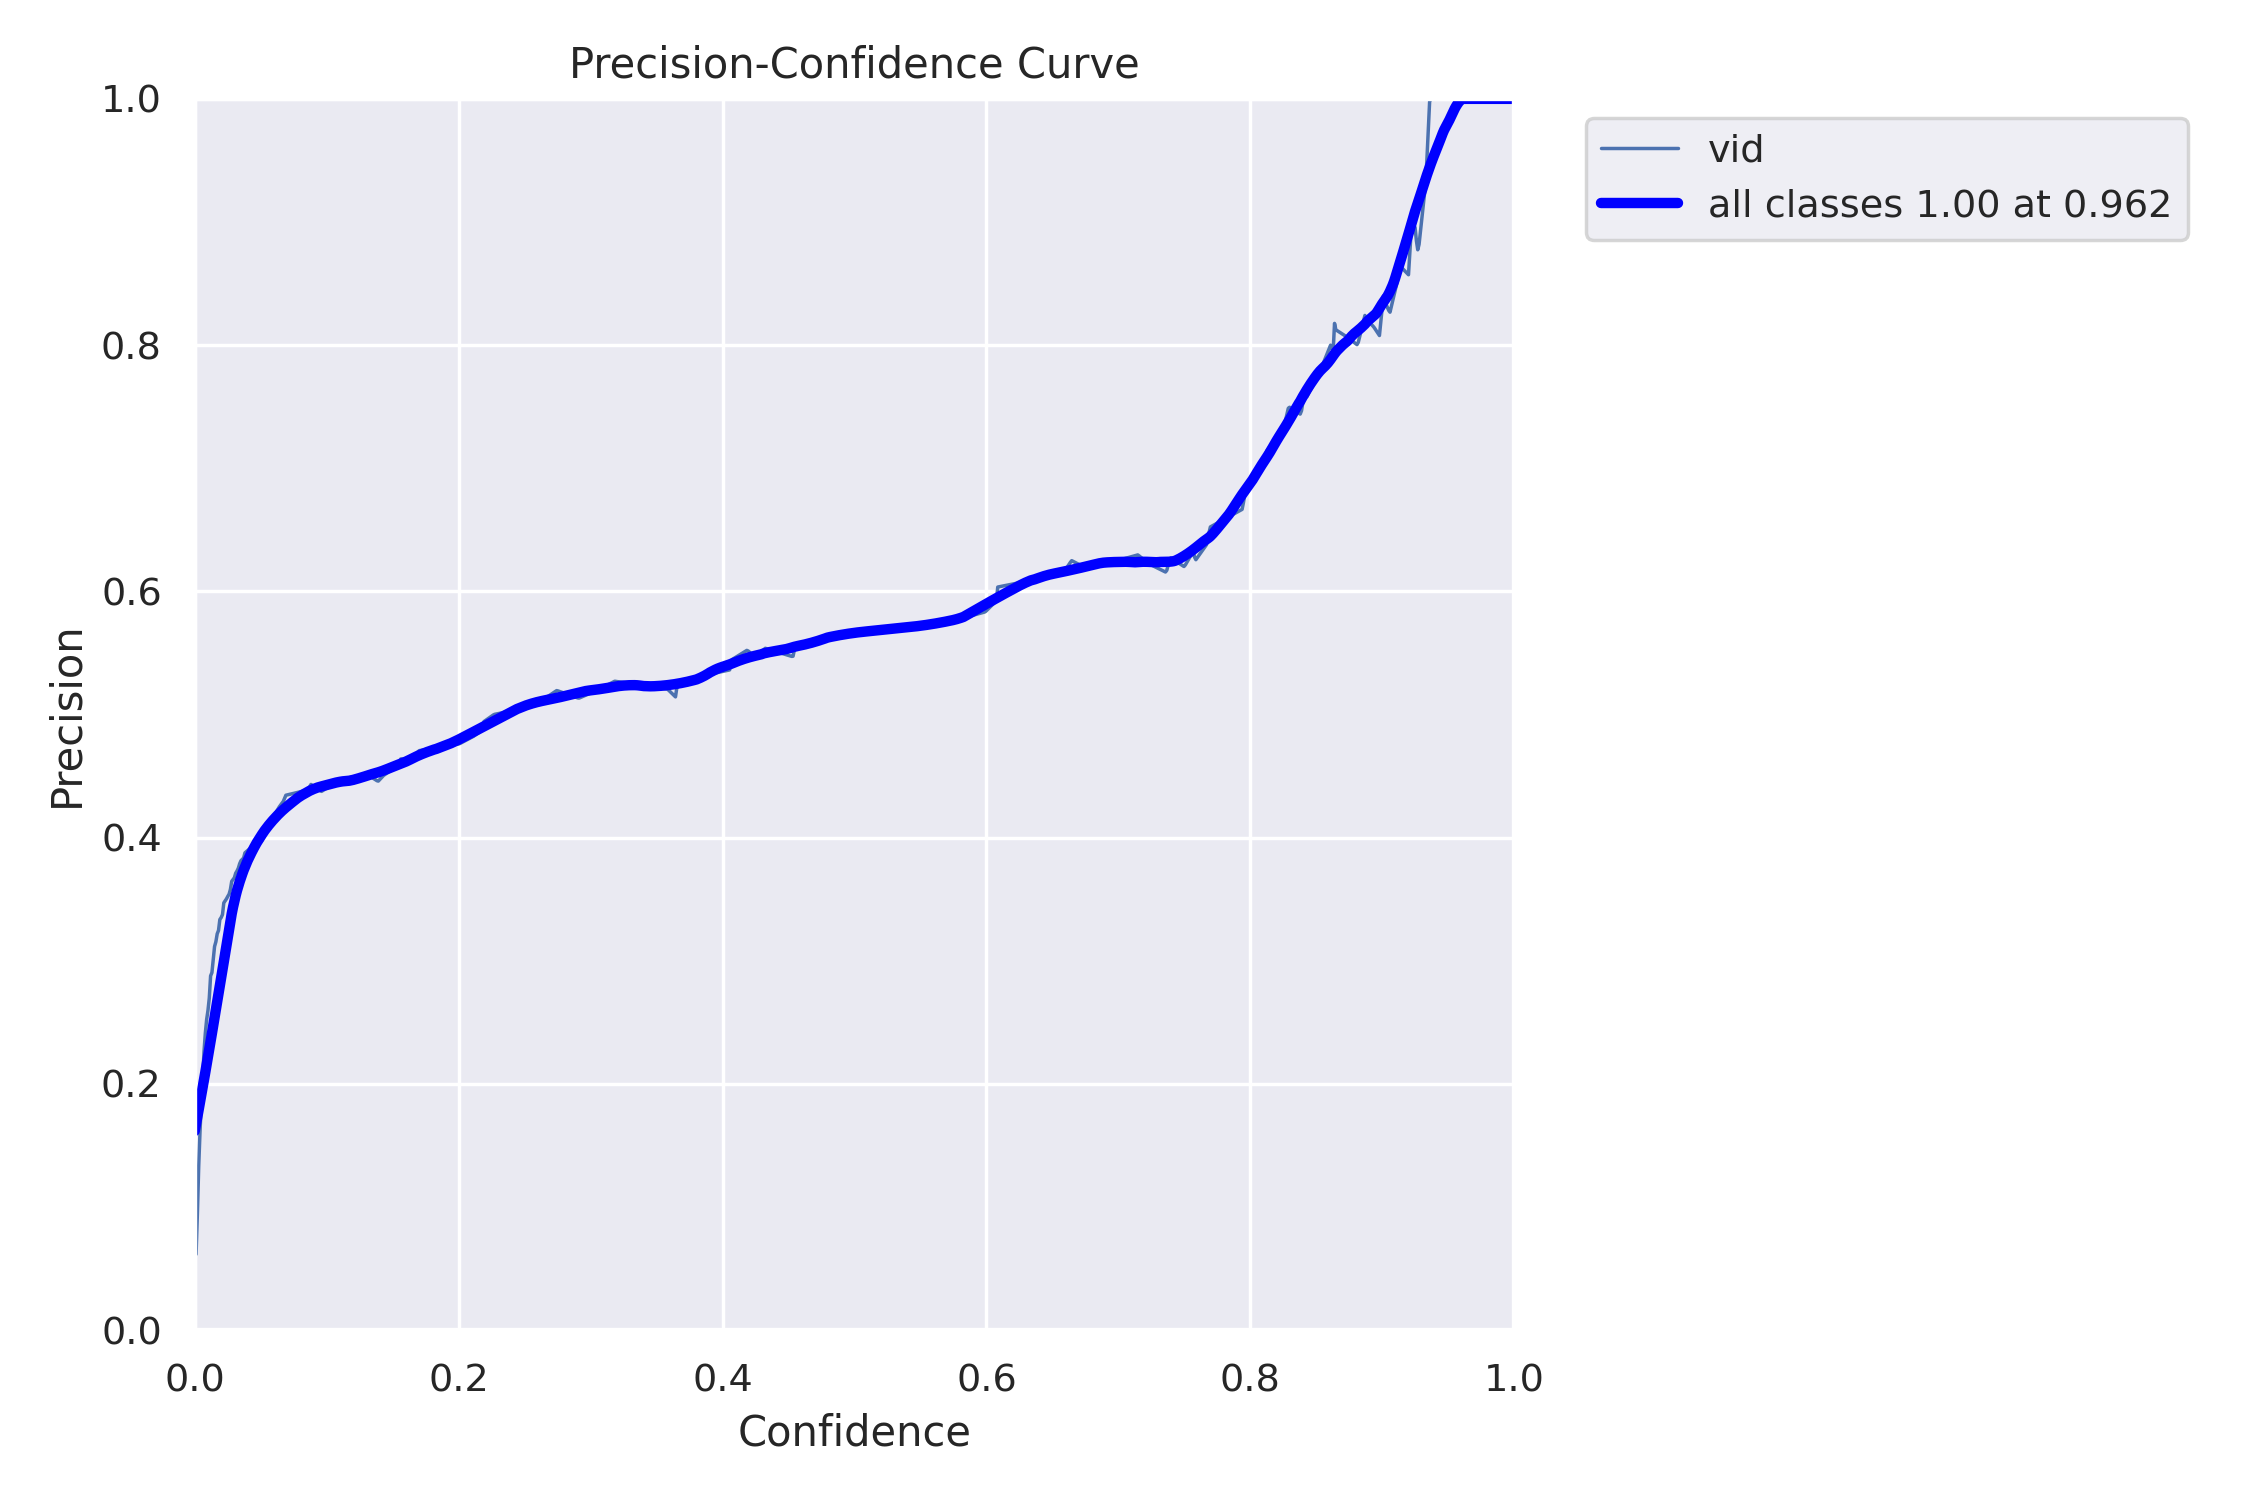

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

The predicison result suggests that at a confidence threshold of 0.856, the precision of the model for all classes is 1.0, meaning that all the objects predicted by the model at this threshold are correct. However, it is important to note that this evaluation is based on the test data used, and the performance may not generalize to new and unseen data.

/content


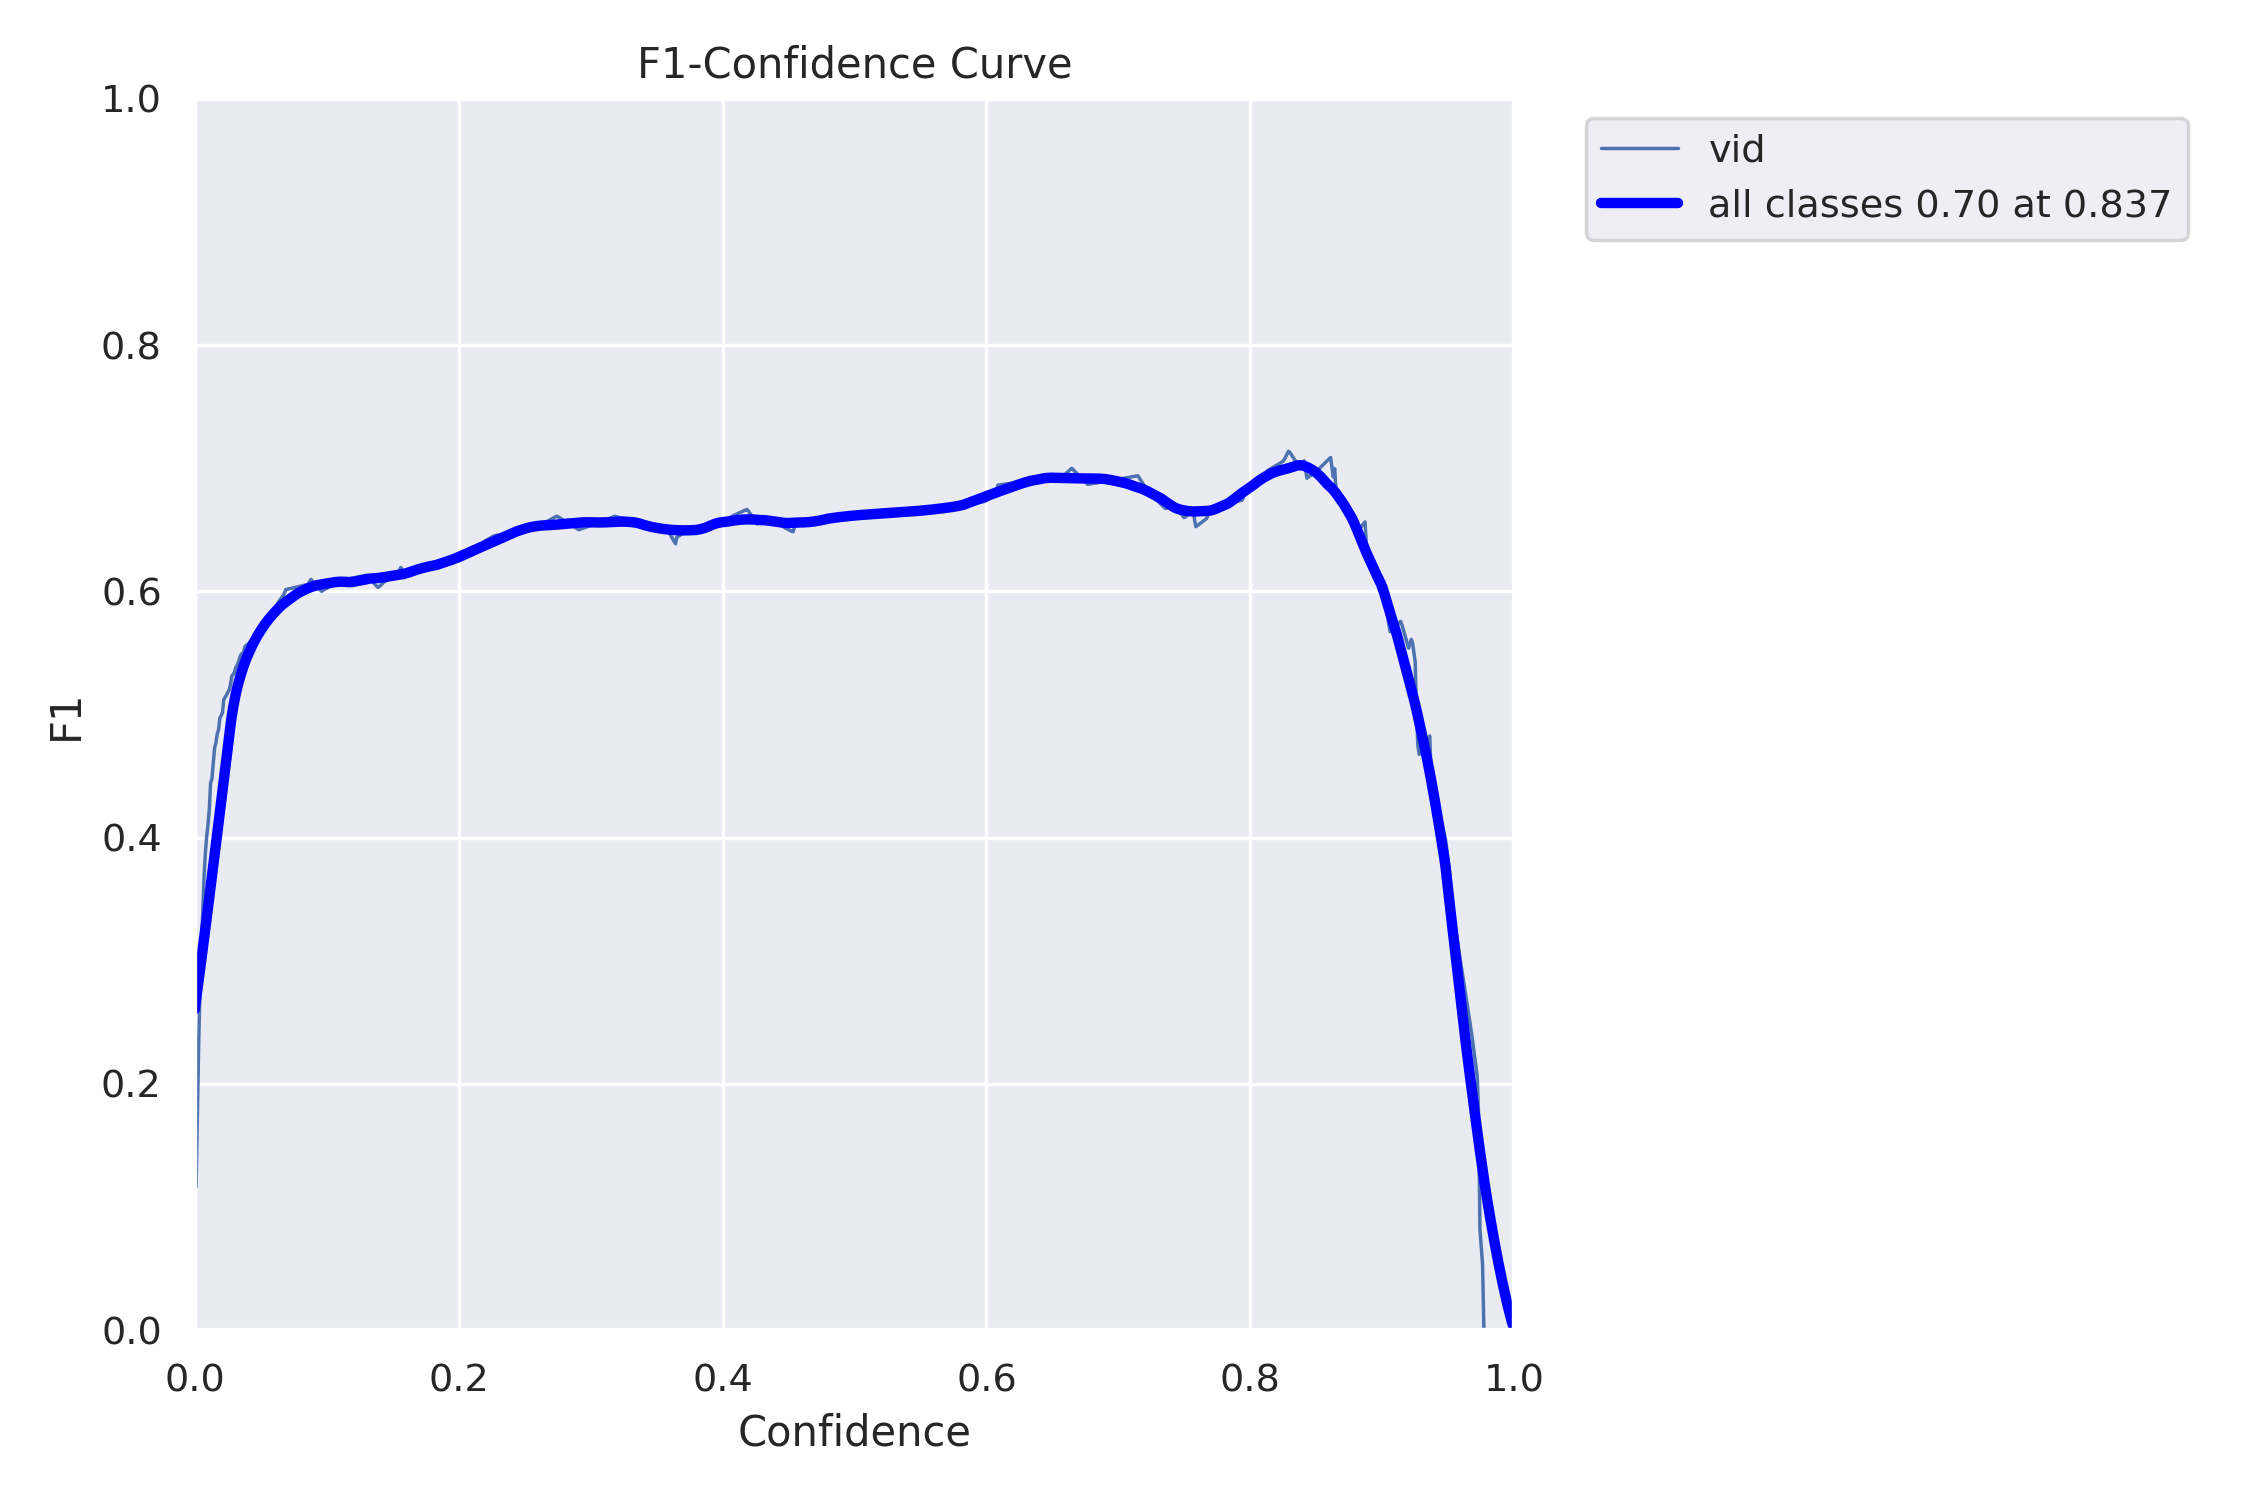

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

As it's shown in the figure above the f1 confidence curve with a value of 0.91 at a threshold of 0.301 for all classes. This means that the model has an overall high accuracy in classifying the samples, with a precision and recall of 0.91. The threshold of 0.301 indicates that the model is more conservative in predicting positive classes, only making predictions when it is very confident about them. 

## Validate the Model

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-11 08:52:03.257669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 08:52:04.148713: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Valeo-1/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.14it/s]
                   all          4         44      0.624      0.793      0.787      0.654
                   vid          4         44      

## Inference

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.75 source={dataset.location}/test/images save=True hide_labels=False

/content
2023-05-11 08:52:33.286860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 08:52:34.136670: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/4 /content/datasets/Valeo-1/test/images/E1-F_jpg.rf.e9764430b0d2a75d0137aa880d4485d2.jpg: 800x800 17 vids, 24.6ms
image 2/4 /content/datasets/Valeo-1/test/images/E2-F_jpg.rf.387387567b8515ebc495520f7aff133c.jpg: 800x800 23 vids, 24.7ms
image 3/4 /content/datasets/Valeo-1/test/images/LU-E_jpg.rf.e6ad02ace2ceefded8b1aa9cf2f46378.jpg: 800x800 5 vids, 24.6ms
image 4/4 /content/dat

### Results.

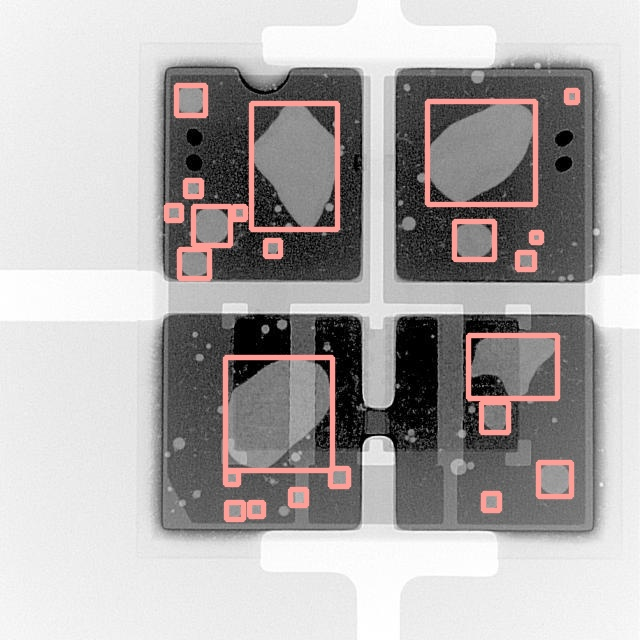

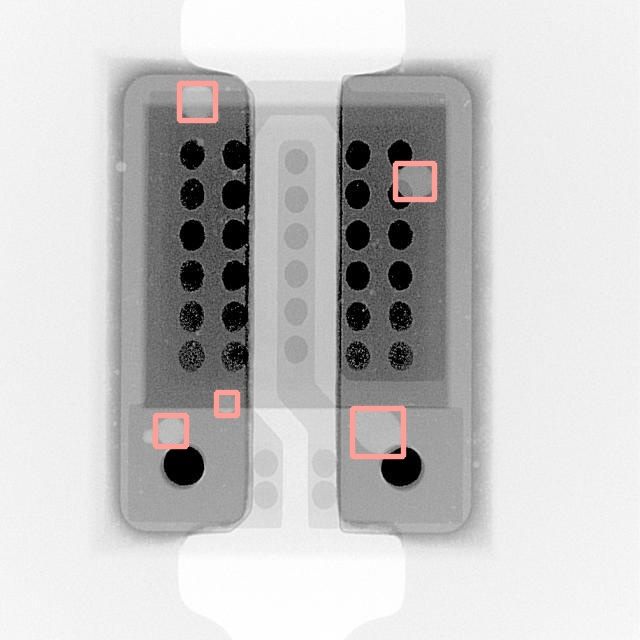

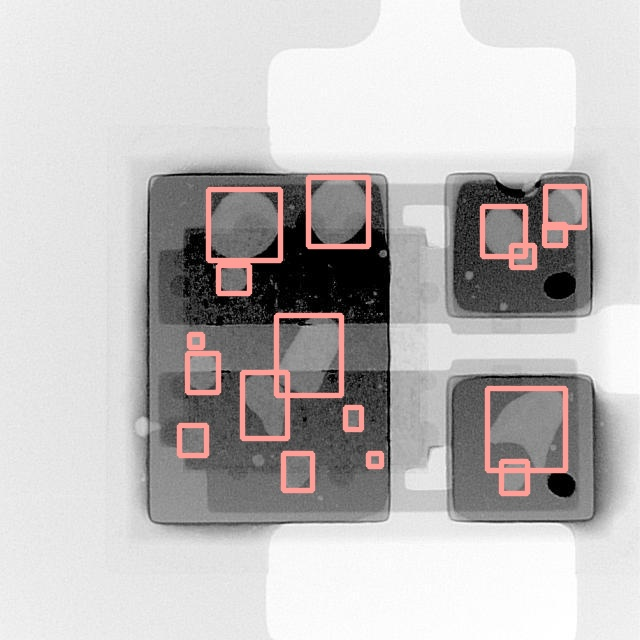

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Part II: Segmentation

In [25]:
# import & downloading the sam weights
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-f1k7cu9d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-f1k7cu9d
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=4eaf201593e65b77d64f105e398d3a4c83615ede3bc5962e97c7ff11c0dc3dc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-mk89_84c/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segm

In [26]:
from ultralytics import YOLO
import numpy as np
import cv2
import sys
import torch
from PIL import Image
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt

In [27]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-05-11 08:53:06--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.85.90, 13.249.85.19, 13.249.85.89, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.85.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   119MB/s    in 16s     

2023-05-11 08:53:21 (155 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [28]:
def yolov8_objecct_detection(model, image_path):
  # Read the image from the given path
  image = cv2.imread(image_path)
  # Convert the image from BGR to RGB color space
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # Use the YOLOv8 model to detect objects in the image
  results = model(image, stream=True)  # generator of Results objects
  # Loop over the detected objects in the image
  for result in results:
      boxes = result.boxes  # Boxes object for bbox outputs
  
  bbox = boxes.xyxy.tolist()
  bbox = [[int(i) for i in box] for box in bbox]
  # Return the bounding boxes and the original image
  return bbox, image

def show_mask(mask, ax, random_color=False):
  # Set the color of the mask to either a random color or a predefined color
  if random_color:
      color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
  else:
      color = np.array([30/255, 144/255, 255/255, 0.6])
  # Get the height and width of the mask
  h, w = mask.shape[-2:]
  # Multiply the mask with the color to create an image
  mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
  # Display the mask image on the given axis
  ax.imshow(mask_image)

def show_box(box, ax):
  # Get the x and y coordinates, width, and height of the bounding box
  x0, y0 = box[0], box[1]
  w, h = box[2] - box[0], box[3] - box[1]
  # Add a rectangle patch to the given axis to display the bounding box
  ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [33]:
# Stores the path of the input image to be loaded and processed.
image_path = '/content/datasets/Valeo-1/test/images/E1-F_jpg.rf.e9764430b0d2a75d0137aa880d4485d2.jpg'
# Reads the input image using OpenCV library and
image = cv2.imread('/content/datasets/Valeo-1/test/images/E1-F_jpg.rf.e9764430b0d2a75d0137aa880d4485d2.jpg')
# converts its color space from BGR to RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# import the YOLOv8 model with the specified weights file path
model=YOLO('/content/runs/detect/train/weights/best.pt')


# import the file path of the checkpoint for (SAM) model.
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
# Stores the type of the model (ViT-H) used for SAM
model_type = "vit_h"
# Stores the device type (GPU/CPU) on which the model and its computations will be performed.
device = "cuda"

# Initializes the SAM model by calling its constructor and passing the 
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
# The model is loaded onto the specified device.
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [34]:
# Creates an instance of the SamPredictor class by passing in a trained sam model.
predictor = SamPredictor(sam)
#Sets the input image for the predictor instance to image.
predictor.set_image(image)

# Uses the yolov8_objecct_detection function to detect bounding boxes in image using the model and store them in yolov8_boxex.
pred_boxex, image = yolov8_objecct_detection(model, image_path)

#Converts the bounding boxes in pred_boxex to a tensor object and sets its device to the device used by the predictor instance.

input_boxes = torch.tensor(pred_boxex, device=predictor.device)

# Applies the transformation on the input boxes to align them with the input image size and store them in transformed.
transformed = predictor.transform.apply_boxes_torch(input_boxes, image.shape[:2])
masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed,
    multimask_output=False,
)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


In [35]:
print(len(masks))

20


In [36]:
mask_dict = {}
for i, mask in enumerate(masks):
    mask_dict[f"mask{i}"] = mask.cpu().numpy()

In [37]:
mask_dict.keys()

dict_keys(['mask0', 'mask1', 'mask2', 'mask3', 'mask4', 'mask5', 'mask6', 'mask7', 'mask8', 'mask9', 'mask10', 'mask11', 'mask12', 'mask13', 'mask14', 'mask15', 'mask16', 'mask17', 'mask18', 'mask19'])

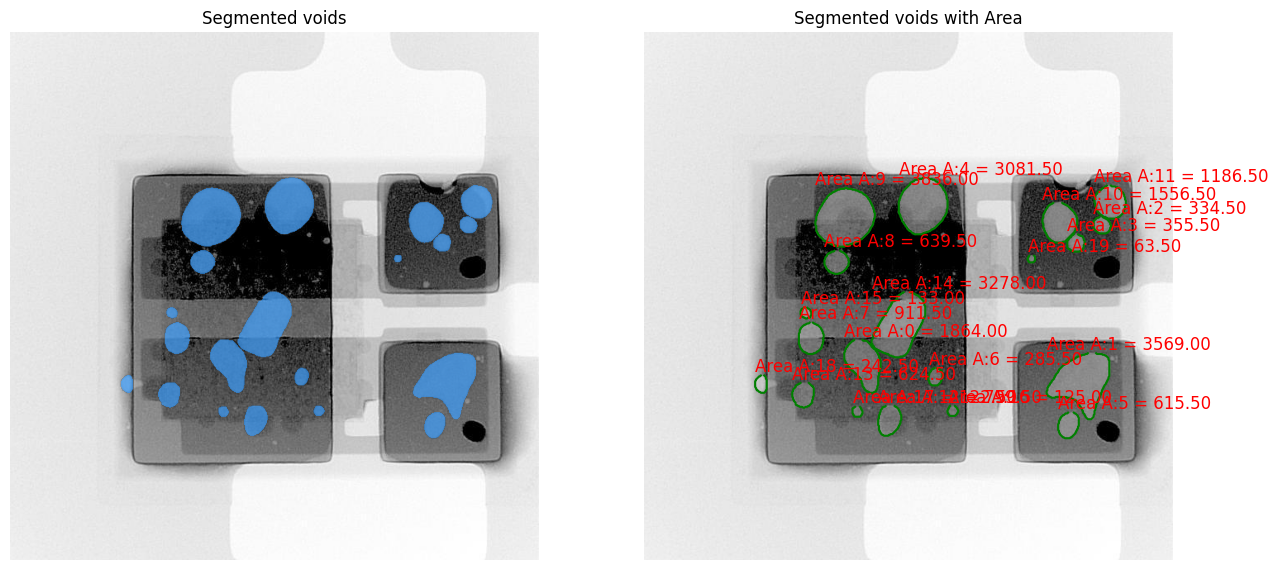

In [38]:
# Compute the area of the entire image
image_area = image.shape[0] * image.shape[1]
#print("Image area:", image_area)

# Create a dictionary to store the area of each segmented object
areas = {}

# Plot the detected image and the segmented image side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(image)
axs[0].axis('off')
# for box in input_boxes:
#   show_box(box.cpu().numpy(), axs[0])
  # axs[0].plot([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]],
  # [bbox[1], bbox[1], bbox[1] + bbox[3], bbox[1] + bbox[3], bbox[1]], 'r')
for mask in masks:
    show_mask(mask.cpu().numpy(), axs[0], random_color=False)
axs[0].axis('off')
axs[0].set_title("Segmented voids")

for i, mask in enumerate(masks):

  # Convert the mask to a binary array
  binary_mask = mask.squeeze().cpu().numpy().astype(np.uint8)

  # Find the contours of the mask
  contours, hierarchy = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for contour in contours:
    # Compute the area of the contour
    area = cv2.contourArea(contour)
    #print("Area A:", area)
    areas[f"A:{i}"] = area

  # Get the largest contour
  largest_contour = max(contours, key=cv2.contourArea)

  # Get the new bounding box
  bbox = [int(x) for x in cv2.boundingRect(largest_contour)]

  # Get the segmentation mask for the object
  segmentation = largest_contour.flatten().tolist()

  # Plot the bounding box and segmentation mask
  #print("Bounding box:", bbox)
  #print("Segmentation mask:", segmentation)
  axs[1].imshow(image)
  axs[1].axis('off')
  for box in input_boxes:
    continue
    #pass  
      #show_box(box.cpu().numpy(), axs[1])
  # axs[1].plot([bbox[0], bbox[0] + bbox[2], bbox[0] + bbox[2], bbox[0], bbox[0]],
  #             [bbox[1], bbox[1], bbox[1] + bbox[3], bbox[1] + bbox[3], bbox[1]], 'r')
  axs[1].plot(segmentation[0::2], segmentation[1::2], 'g')
  axs[1].text(bbox[0], bbox[1]-5, f"Area A:{i} = {areas[f'A:{i}']:.2f}", fontsize=12, color='red')
  axs[1].set_title("Segmented voids with Area")

plt.show()

# Compute the total area of all segmented objects
total_area = sum(areas.values())
#print("Total area:", total_area)


## Conclusion 

Based on this task, I have implemented a deep learning model to detect voids in solder using both segmentation and object detection approaches. I have utilized a state-of-the-art object detection model (YOLOV8) to detect the voids and then applied the Segment Anything Model (SAM) to segment only the specific areas of interest.

After obtaining the segmented voids, I have calculated the area of each void to quantify the rate of voids.

Overall, my approach has effectively detected and segmented voids in solder.

## References:
1. https://github.com/ultralytics/ultralytics
2. https://blog.roboflow.com/whats-new-in-yolov8/
3. https://github.com/facebookresearch/segment-anything 